In [1]:
import agine
import random
import numpy as np
import pandas as pd

Setting up agine-Environment...
	Detected OS            : Windows-10
	scikit-learn Options   : True
	Threading Availibilty  : False
	Tensorflow Availibilty : False
Available PKGS:      ['numpy', 'pandas', 'fiona', 'shapely', 'pyproj', 'geopandas', 'pandas', 'fiona', 'shapely', 'pyproj', 'geopandas', 'rasterio', 'scikit-learn']
Available Functions: ['commons', 'point-function', 'line-of-sight']


c:\users\debmalya.pramanik\documents\repository\agine\agine\api\__init__.py:31: VersionWarning: numpy Requires 1.18.1 or Above, Got 1.16.5
  warnings.warn(f'{pkgName} Requires {_minReq_[1]} or Above, Got {_pkgVer_}', VersionWarning)
c:\users\debmalya.pramanik\documents\repository\agine\agine\api\__init__.py:34: LimitedFunctionality: Unable to Check scikit-learn, got TypeError '>' not supported between instances of 'str' and 'float'.
Got Version: ?0.21.3, Req.: ?c
  LimitedFunctionality)


In [66]:
random.seed(7)
np.random.seed(7)

random_char = lambda : ''.join([random.choice('ABCDE') for _ in range(7)])
random_name = lambda : f"#-{random_char()}-{str(np.random.randint(0, 10)).zfill(4)}-{str(np.random.randint(0, 100)).zfill(4)}"

In [58]:
data = pd.read_csv('./sample_data.csv')
names = [random_name() for _ in range(data.shape[0])]

In [63]:
len(set(names)) == data.shape[0]

True

In [73]:
data['Location Names'] = names
data['Locations'] = data[['xLocation', 'yLocation']].apply(lambda x: tuple(x), axis = 1)
data = data[['Location Names', 'Locations', 'xLocation', 'yLocation']]

data.sample(7, random_state = 7)

,Location Names,Locations,xLocation,yLocation
149,#-AACEABA-0006-0084,"(76.00125, 18.00125)",76.001250,18.001250
84,#-DEBEEEA-0009-0042,"(91.55740278, 26.0573875)",91.557403,26.057388
40,#-DDABBBA-0000-0012,"(92.63208111, 24.83219917)",92.632081,24.832199
66,#-ACADACE-0005-0073,"(94.64657222, 26.81863667)",94.646572,26.818637
106,#-BAADDEB-0005-0021,"(91.34857861, 26.5225925)",91.348579,26.522592
41,#-BEDBEED-0009-0009,"(92.59156972, 24.74908917)",92.591570,24.749089
52,#-EEEEBCD-0006-0070,"(94.64469361, 26.8372925)",94.644694,26.837293


In [74]:
all_neighbor = agine.NearestNeighbor(data[['Location Names', 'Locations']], UIN = 'Location Names', loc = 'Locations', num_nbr = 3)

Start >> Generating shapely Objects, at Tue Aug  4 10:38:52 2020
	 Completed in 20.9 Secs.
Start >> Joining Data with gpd.sjoin(), at Tue Aug  4 10:39:13 2020
	 Completed in 0.13 Secs.
NBR_Location Names == NaN - denotes a Location w/o a Neighbor


Calculating Distance with haversine Metric: 1858it [00:00, 5626.04it/s]


Start >> Calculating Ranks, at Tue Aug  4 10:39:13 2020
	 Completed in 0.02 Secs.


In [83]:
print(f'ZERO NBRs Count = {all_neighbor[all_neighbor.rnk == 0].shape}')
all_neighbor[all_neighbor.rnk == 0].head()

ZERO NBRs Count = (5, 6)


,Location Names,Locations,NBR_Location Names,NBR_Locations,Calculated Distance (km),rnk
1862,#-AACEABA-0006-0084,"(76.00125, 18.00125)",NaN,NaN,NaN,0.0
1860,#-BDCECDD-0005-0083,"(92.64299111, 25.99765139)",NaN,NaN,NaN,0.0
1861,#-CDAEBBD-0000-0011,"(90.6597525, 26.14974806)",NaN,NaN,NaN,0.0
1859,#-EAACABD-0003-0077,"(90.6524075, 26.021292499999998)",NaN,NaN,NaN,0.0
1858,#-EDABAEB-0009-0014,"(90.20917083, 26.23130306)",NaN,NaN,NaN,0.0


In [81]:
all_neighbor.sample(15, random_state = 7)

,Location Names,Locations,NBR_Location Names,NBR_Locations,Calculated Distance (km),rnk
771,#-EEADBEA-0006-0043,"(92.65370972, 24.801804999999998)",#-BBBDEAE-0007-0077,"(92.64750667, 24.7827375)",0.696682,1.0
980,#-CAACAEB-0006-0047,"(94.55555889, 26.79868694)",#-CCABCBD-0005-0079,"(94.54242583, 26.86145194)",1.561715,2.0
1135,#-EAEADCA-0009-0073,"(91.49386528, 26.19384556)",#-BDCADAE-0006-0018,"(91.50511472, 26.17388194)",1.252229,1.0
398,#-DBACEAA-0007-0023,"(89.79661389, 26.29883444)",#-BCCABDE-0008-0083,"(89.80037833, 26.24423861)",0.419131,1.0
1683,#-DBAAACA-0004-0077,"(91.2973725, 26.68734194)",#-AACBAEC-0009-0044,"(91.2889575, 26.61280722)",0.954216,3.0
1491,#-EDAAACE-0008-0052,"(91.25420278, 26.276415000000004)",#-EABDBCB-0008-0021,"(91.26764361, 26.29213583)",1.495047,2.0
1731,#-EDBCCDA-0007-0016,"(91.29156833, 26.65732667)",#-AACBAEC-0009-0044,"(91.2889575, 26.61280722)",0.310976,1.0
385,#-ADDABAB-0006-0031,"(89.78388889, 26.13504056)",#-DDDCABA-0007-0096,"(89.78187333, 26.20144944)",0.225860,2.0
1852,#-EBDBBDA-0004-0032,"(91.35718806, 26.59592222)",#-ADDDCDD-0002-0037,"(91.36163889, 26.65866917)",0.521857,3.0
66,#-CEDCDCE-0000-0075,"(89.78780944, 26.19736417)",#-ACDAACE-0008-0055,"(89.78519083, 26.21696583)",0.291289,1.0


In [88]:
from agine.api import AVLBL_OPTIONS

In [89]:
AVLBL_OPTIONS

['commons', 'point-function', 'line-of-sight']

The above code is created using `shapely.Polygon()` where a `(lat, lon)` is _first projected_ to its equivalent which can be visually seen with [this D3.js Visualization](https://observablehq.com/@d3/gallery). Note that, this library currently supports on **WGS84** $\approx$ **EPSG:4326** Reference System Only. The defaults can be accessed using the following code:
```python
from agine.config import *
print(CRS, DATUM) # gives the default coordinate reference system
>> {'init': 'epsg:4326'} WGS84
print(UNITS) # supported input/output units
>> ['m', 'km', 'rad', 'none']
print(METRICS) # supported Distance Calculation Metrics
>> ['euclidean', 'manhattan', 'haversine']
```

A Circular Projection, given the `center lat, lon` which are internally converted **Azimuthal Equidistant Projection (AEQD)** and back to WGS84, is available under `agine.commons()` and is auto-imported with _init-time Option Registrations_ if `point-function` is available in `AVLBL_OPTIONS`.

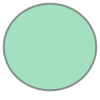

In [92]:
agine.create_circle_polygon(78.9629, 20.5937, radius = 12500)